- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
 
## SVM IMAGE CLASSFIER USING FASHION IMAGES 

#### Author: SOUMENDRA BAGH 

#### Date: SEPT 2020

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study problem statement:  

Build and delpoy an image classfier using BOOSTING algorithm

### Input data details

Fashion (fashion_mnist) dataset from Keras comes preloaded with  train and test images along with the labels.


Number of images = 70000 
    1. Training images = 60000
    2. Testig images = 10000
    3. Image size = 28 x 28
    4. Channel = 1

Labels: 

    0. T-shirt/top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt
    7. Sneaker
    8. Bag
    9. Ankle boot



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study approach:

#### Step 1: Universal Library and Package declaration

#### Step 2: Import data to python

#### Step 3: Clean, prepare and validate data 

#### Step 4: Inferential Statistics

#### Step 5: Exploratory Data Analysis

#### Step 6: Data Preprocessing for Model Implementation

#### Step 7: Model Design Tuning and Testing

#### Step 8: Model pickling

#### Step 9: Model deployment ( Web or UI )

#### Step 10: Conclusion

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Step 1: Universal Library and Package declaration

In [271]:
# Importing Dependencies
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

# Visualization Libraries from Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing SVM Classifier
from sklearn.svm import SVC

# Dependency for computing confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Dependencies for Pickling
import pickle
from sklearn.externals import joblib 

# Step 2: Import data to python

In [272]:
# Loading fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data() 

In [273]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

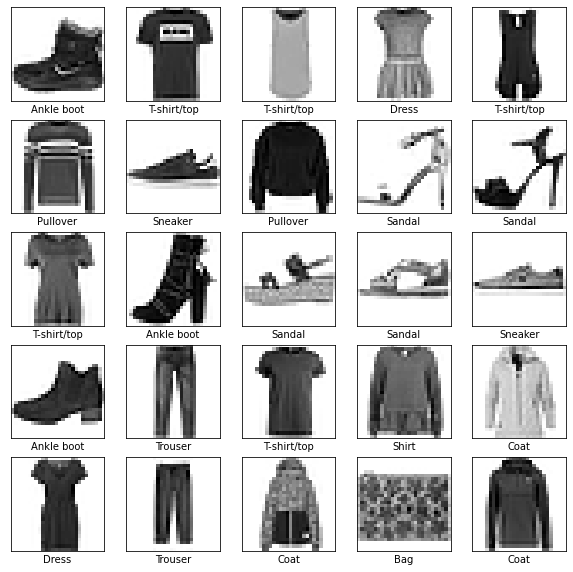

In [274]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Y[i]])
plt.show()

# Step 3: Clean, prepare and validate data 

## 3(a). Checking and Prepping Data

In [275]:
# Check for Null/Missing Values
print("Missing Values:")
print("train_X :", np.isnan(train_X).any().sum())
print("train_Y :",np.isnan(train_Y).any().sum())
print("test_X :",np.isnan(test_X).any().sum())
print("test_Y :",np.isnan(test_Y).any().sum())


# In case the input data is pandas dataframe
#print("train_X :", train_X.isnull().any().sum())
#print("train_Y :",train_Y.isnull().any().sum())
#print("test_X :",test_X.isnull().any().sum())
#print("test_Y :",test_Y.isnull().any().sum())


Missing Values:
train_X : 0
train_Y : 0
test_X : 0
test_Y : 0


In [276]:
print("Shape of the fashion MNIST Data before any processing:")
print("train_X :", train_X.shape)
print("train_Y :",train_Y.shape)
print("test_X :",test_X.shape)
print("test_Y :",test_Y.shape)

Shape of the fashion MNIST Data before any processing:
train_X : (60000, 28, 28)
train_Y : (60000,)
test_X : (10000, 28, 28)
test_Y : (10000,)


In [277]:
# We have to convert the 28,28 i.e. 2D list into a 1D list for feeding into SVM
train_X = train_X.reshape(60000,784)
test_X = test_X.reshape(10000,784)

In [278]:
# The Data which we received from Keras is in the form of numpy arrays, we will convert them into dataframe for convenience
train_X = pd.DataFrame(train_X)
train_Y = pd.DataFrame(train_Y)
test_X = pd.DataFrame(test_X)
test_Y = pd.DataFrame(test_Y)

In [279]:
print("After flattening and converting into Dataframe Shape of the fashion MNIST Data :")
print("train_X :", train_X.shape)
print("train_Y :",train_Y.shape)
print("test_X :",test_X.shape)
print("test_Y :",test_Y.shape)

After flattening and converting into Dataframe Shape of the fashion MNIST Data :
train_X : (60000, 784)
train_Y : (60000, 1)
test_X : (10000, 784)
test_Y : (10000, 1)


In [280]:
train_X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


## 3(b). Renaming Columns

In [281]:
# Creating list containing Column Names
col = list()
for i in train_X.columns:
  col.append("Pixel" + str(i+1))

In [282]:
# Renaming Column Names For Independent and Dependent Features
train_X.columns = col
test_X.columns = col
train_Y.columns = ['label']
test_Y.columns = ['label']

## 3(c).Printing the top 5 rows of Train and Test Data

In [283]:
train_X.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Pixel17,Pixel18,Pixel19,Pixel20,Pixel21,Pixel22,Pixel23,Pixel24,Pixel25,Pixel26,Pixel27,Pixel28,Pixel29,Pixel30,Pixel31,Pixel32,Pixel33,Pixel34,Pixel35,Pixel36,Pixel37,Pixel38,Pixel39,Pixel40,...,Pixel745,Pixel746,Pixel747,Pixel748,Pixel749,Pixel750,Pixel751,Pixel752,Pixel753,Pixel754,Pixel755,Pixel756,Pixel757,Pixel758,Pixel759,Pixel760,Pixel761,Pixel762,Pixel763,Pixel764,Pixel765,Pixel766,Pixel767,Pixel768,Pixel769,Pixel770,Pixel771,Pixel772,Pixel773,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [284]:
train_Y.head()

,label
0,9
1,0
2,0
3,3
4,0


In [285]:
test_X.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Pixel17,Pixel18,Pixel19,Pixel20,Pixel21,Pixel22,Pixel23,Pixel24,Pixel25,Pixel26,Pixel27,Pixel28,Pixel29,Pixel30,Pixel31,Pixel32,Pixel33,Pixel34,Pixel35,Pixel36,Pixel37,Pixel38,Pixel39,Pixel40,...,Pixel745,Pixel746,Pixel747,Pixel748,Pixel749,Pixel750,Pixel751,Pixel752,Pixel753,Pixel754,Pixel755,Pixel756,Pixel757,Pixel758,Pixel759,Pixel760,Pixel761,Pixel762,Pixel763,Pixel764,Pixel765,Pixel766,Pixel767,Pixel768,Pixel769,Pixel770,Pixel771,Pixel772,Pixel773,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,13,67,0,0,0,0,50,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,120,209,226,247,...,0,0,0,0,0,39,249,255,123,0,0,0,0,0,0,0,49,205,197,11,0,4,1,2,2,2,2,2,2,2,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,67,177,129,153,117,129,146,141,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,196,255,...,161,255,252,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,159,71,0,0,68,176,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,123,108,99,99,84,83,86,92,70,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,248,230,...,224,248,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,174,101,0,0,0,146,146,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,0,57,67,73,76,76,83,62,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,13,79,128,201,...,156,174,197,182,162,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,72,95,109,111,111,106,101,71,12,0,0,0,0,0,0,0,0


In [286]:
test_Y.head()

,label
0,9
1,2
2,1
3,1
4,6


# Step 4: Inferential Statistics
----
NOTE : There are 784 Independent Features so it won't be possible to draw inference on each of them. Hence, we will be radomly selecting three features/pixel columns for our study

Text(0.5, 0, '<---- Intensity(0-255) ---->')

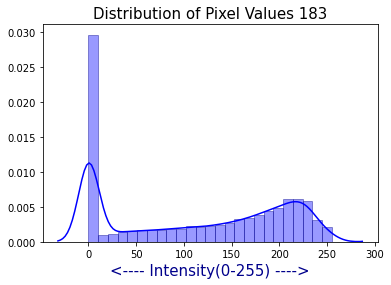

In [287]:
# Distribution of Pixel 183
sns.distplot(train_X["Pixel183"], hist=True, kde=True, 
             color = 'blue', hist_kws={'edgecolor':'darkblue'})

plt.title("Distribution of Pixel Values 183", fontsize = 15)
plt.xlabel("<---- Intensity(0-255) ---->", fontsize = 15, color = "darkblue")

Text(0.5, 0, '<---- Intensity(0-255) ---->')

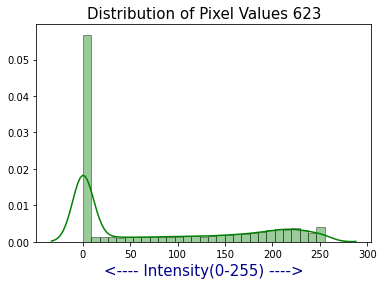

In [288]:
# Distribution of Pixel 623
sns.distplot(train_X["Pixel623"], hist=True, kde=True, 
             color = 'green', hist_kws={'edgecolor':'black'})

plt.title("Distribution of Pixel Values 623", fontsize = 15)
plt.xlabel("<---- Intensity(0-255) ---->", fontsize = 15, color = "darkblue")

Text(0.5, 0, '<---- Intensity(0-255) ---->')

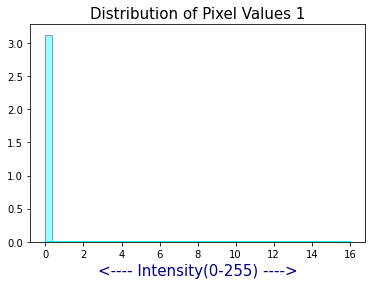

In [289]:
# Distribution of Pixel 1
sns.distplot(train_X["Pixel1"], hist=True, kde=True, 
             color = 'cyan', hist_kws={'edgecolor':'darkblue'})

plt.title("Distribution of Pixel Values 1", fontsize = 15)
plt.xlabel("<---- Intensity(0-255) ---->", fontsize = 15, color = "darkblue")

Text(0.5, 0, '<---- Intensity(0-255) ---->')

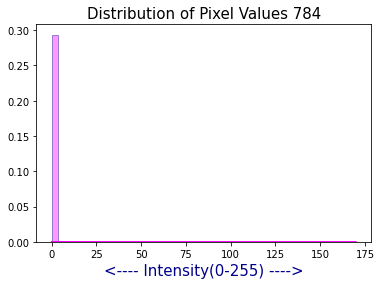

In [290]:
# Distribution of Pixel 784
sns.distplot(train_X["Pixel784"], hist=True, kde=True, 
             color = 'magenta', hist_kws={'edgecolor':'darkblue'})

plt.title("Distribution of Pixel Values 784", fontsize = 15)
plt.xlabel("<---- Intensity(0-255) ---->", fontsize = 15, color = "darkblue")

# Step 5: Exploratory Data Analysis

## 5(a). For Independent Features(in Train and Test Data)

In [291]:
train_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pixel1,60000.0,0.000800,0.092554,0.0,0.0,0.0,0.0,16.0
Pixel2,60000.0,0.005783,0.249033,0.0,0.0,0.0,0.0,36.0
Pixel3,60000.0,0.030083,0.767868,0.0,0.0,0.0,0.0,119.0
Pixel4,60000.0,0.103800,2.512017,0.0,0.0,0.0,0.0,164.0
Pixel5,60000.0,0.249683,4.331376,0.0,0.0,0.0,0.0,224.0
...,...,...,...,...,...,...,...,...
Pixel780,60000.0,17.916900,45.173634,0.0,0.0,0.0,0.0,255.0
Pixel781,60000.0,8.485717,29.448614,0.0,0.0,0.0,0.0,255.0
Pixel782,60000.0,2.706333,17.258682,0.0,0.0,0.0,0.0,255.0
Pixel783,60000.0,0.819000,9.133252,0.0,0.0,0.0,0.0,255.0


In [292]:
test_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pixel1,10000.0,0.0006,0.044720,0.0,0.0,0.0,0.0,4.0
Pixel2,10000.0,0.0102,0.493680,0.0,0.0,0.0,0.0,45.0
Pixel3,10000.0,0.0609,2.560634,0.0,0.0,0.0,0.0,218.0
Pixel4,10000.0,0.0694,2.111973,0.0,0.0,0.0,0.0,185.0
Pixel5,10000.0,0.2368,4.843271,0.0,0.0,0.0,0.0,227.0
...,...,...,...,...,...,...,...,...
Pixel780,10000.0,18.2755,45.578922,0.0,0.0,0.0,0.0,249.0
Pixel781,10000.0,8.7540,29.999685,0.0,0.0,0.0,0.0,239.0
Pixel782,10000.0,3.0218,18.128144,0.0,0.0,0.0,0.0,255.0
Pixel783,10000.0,0.9417,9.976385,0.0,0.0,0.0,0.0,255.0


## 5(a). For Dependent Features/Label (in Train and Test Data)

Text(0.5, 1.0, ' Distribution w.r.t. Labels')

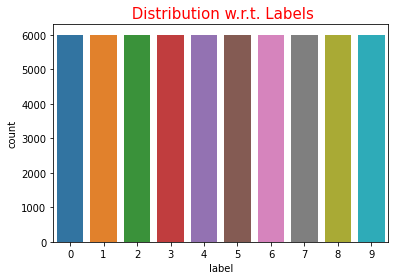

In [293]:
sns.countplot( x = 'label', data = train_Y)
plt.title(' Distribution w.r.t. Labels', fontsize = 15, color = 'red')

Text(0.5, 1.0, ' Distribution w.r.t. Labels')

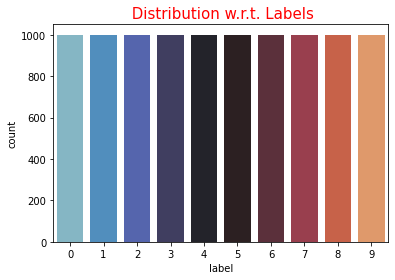

In [294]:
sns.countplot( x = 'label', data = test_Y, palette = 'icefire')
plt.title(' Distribution w.r.t. Labels', fontsize = 15, color = 'red')

In [295]:
train_Y['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [296]:
test_Y['label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [297]:
# check for linear relationships among feature, so that we can eliminate any highly interrelated feature to reduce dimension
'''
cor = test_X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot= True, cmap="YlGnBu")
'''

'\ncor = test_X.corr()\nplt.figure(figsize=(15,10))\nsns.heatmap(cor, annot= True, cmap="YlGnBu")\n'

### Step 6: Data Preprocessing for Model Implementation

In [298]:
# Normalizing/Scaling the features w.r.t. Maximum Values
train_X = train_X.div(255).round(3)
test_X = test_X.div(255).round(3)

In [299]:
train_X.head(2)

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Pixel17,Pixel18,Pixel19,Pixel20,Pixel21,Pixel22,Pixel23,Pixel24,Pixel25,Pixel26,Pixel27,Pixel28,Pixel29,Pixel30,Pixel31,Pixel32,Pixel33,Pixel34,Pixel35,Pixel36,Pixel37,Pixel38,Pixel39,Pixel40,...,Pixel745,Pixel746,Pixel747,Pixel748,Pixel749,Pixel750,Pixel751,Pixel752,Pixel753,Pixel754,Pixel755,Pixel756,Pixel757,Pixel758,Pixel759,Pixel760,Pixel761,Pixel762,Pixel763,Pixel764,Pixel765,Pixel766,Pixel767,Pixel768,Pixel769,Pixel770,Pixel771,Pixel772,Pixel773,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.161,0.737,0.404,0.212,0.188,0.169,0.341,0.659,0.522,0.063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.192,0.533,0.859,0.847,0.894,...,0.957,0.941,0.953,0.839,0.878,0.635,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.545,0.573,0.51,0.529,0.529,0.537,0.49,0.486,0.49,0.475,0.467,0.447,0.51,0.298,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
test_X.head(2)

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Pixel17,Pixel18,Pixel19,Pixel20,Pixel21,Pixel22,Pixel23,Pixel24,Pixel25,Pixel26,Pixel27,Pixel28,Pixel29,Pixel30,Pixel31,Pixel32,Pixel33,Pixel34,Pixel35,Pixel36,Pixel37,Pixel38,Pixel39,Pixel40,...,Pixel745,Pixel746,Pixel747,Pixel748,Pixel749,Pixel750,Pixel751,Pixel752,Pixel753,Pixel754,Pixel755,Pixel756,Pixel757,Pixel758,Pixel759,Pixel760,Pixel761,Pixel762,Pixel763,Pixel764,Pixel765,Pixel766,Pixel767,Pixel768,Pixel769,Pixel770,Pixel771,Pixel772,Pixel773,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051,0.263,0.0,0.0,0.0,0.0,0.196,0.149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,0.471,0.82,0.886,0.969,...,0.0,0.0,0.0,0.0,0.0,0.153,0.976,1.0,0.482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192,0.804,0.773,0.043,0.0,0.016,0.004,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.012,0.0,0.012,0.682,0.741,0.263,0.0,0.0,0.0


# Step 7: Model Design Tuning and Testing

## 7(a). Linear Model

In [227]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(train_X, train_Y)

# predict
y_pred = model_linear.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [302]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [228]:
# accuracy
print("Accuracy with Linear Kernel:", metrics.accuracy_score(y_true=test_Y, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true = test_Y, y_pred = y_pred))

Accuracy with Linear Kernel: 0.8464 

[[814   2  13  46   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 768   8 110   0  79   0   7   0]
 [ 54  15  19 843  26   0  40   0   3   0]
 [  1   2 114  33 773   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 120  30  93   0 564   0  17   0]
 [  0   0   0   0   0  39   0 934   1  26]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]


## 7(b). Non-Linear Model(RBF Kernel)

In [229]:
# linear model

model_nonlinear = SVC(kernel='rbf')
model_nonlinear.fit(train_X, train_Y)

# predict
y_pred = model_linear.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [301]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [230]:
# accuracy
print("Accuracy with Non-Linear(rbf) Kernel:", metrics.accuracy_score(y_true=test_Y, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true = test_Y, y_pred = y_pred))

Accuracy with Non-Linear(rbf) Kernel: 0.8464 

[[814   2  13  46   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 768   8 110   0  79   0   7   0]
 [ 54  15  19 843  26   0  40   0   3   0]
 [  1   2 114  33 773   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 120  30  93   0 564   0  17   0]
 [  0   0   0   0   0  39   0 934   1  26]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]


In [ ]:
# For finding optimal hyperparams, we can use GridSearchCV or RandomSearchCV
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(train_X, train_Y)
'''

In [ ]:
'''
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
'''
# Then we can use the best value for 'gamma' and 'C' for building the best SVC Model. 

# Step 8: Model pickling

## 8(a). With Pickle

In [ ]:
import pickle 
  
# Saving the trained models as a pickle string. 
saved_linear_model = pickle.dumps(model_linear) 
saved_nonlinear_model = pickle.dumps(model_nonlinear) 
  
# Load the pickled model 
lin_from_pickle = pickle.loads(saved_linear_model) 
nonlin_from_pickle = pickle.loads(saved_nonlinear_model) 

In [234]:
# Use the loaded pickled model to make predictions 
y_pred_p = lin_from_pickle.predict(test_X) 

# accuracy
print("Accuracy with Linear Pickle Model:", metrics.accuracy_score(y_true=test_Y, y_pred=y_pred_p), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true = test_Y, y_pred = y_pred_p))

Accuracy with Linear Pickle Model: 0.8464 

[[814   2  13  46   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 768   8 110   0  79   0   7   0]
 [ 54  15  19 843  26   0  40   0   3   0]
 [  1   2 114  33 773   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 120  30  93   0 564   0  17   0]
 [  0   0   0   0   0  39   0 934   1  26]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]


## 8(b). With joblib: 
Joblib is the replacement of pickle as it is more efficent on objects that carry large numpy arrays.

In [238]:
# Save the model as a pickle in a file 
joblib.dump(model_linear, 'model_linear.pkl') 
  
# Load the model from the file 
model_linear_from_joblib = joblib.load('model_linear.pkl')  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Step 9: Model deployment  ( Web or UI )

# Step 10: Conclusion

## (a). Selection of problem depends upon nature of distribution of datapoints in mathematical space. 

## (b). SVM cannot be used for higher dimension datasets as computations goes up in case of use of non linear kernels.

## (c). It can offers excellent predictions on non numerical datasets where dataset is not large enough to train deep learning models.

     ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited